In [1]:
import pandas
tweet_sentiment = pandas.read_csv('tweet-clean-labeled4.csv')
tweet_sentiment

,Unnamed: 0,full_text,date,polarity,subjectivity,analysis
0,0,manfaat penuh eh udah kasih admin fee yaudah f...,Thu Nov 12 17:27:57 +0000 2020,0.425000,0.525000,Positive
1,1,bank ga promosi gencar bank gurem kayak jenius...,Thu Nov 12 17:05:53 +0000 2020,0.016667,0.433333,Positive
2,2,nemu reddit banding fitur bank bebas biaya adm...,Thu Nov 12 15:55:42 +0000 2020,0.400000,0.800000,Positive
3,3,cimb niaga kah,Thu Nov 12 15:21:04 +0000 2020,0.000000,0.000000,Neutral
4,4,kantor cabang cimb niaga dekat bawa ktp asli n...,Thu Nov 12 15:20:18 +0000 2020,0.158333,0.383333,Positive
...,...,...,...,...,...,...
273,273,hai ada rujuk cimb malaysia cimb niaga indonesia,Wed Nov 04 06:02:03 +0000 2020,0.000000,0.000000,Neutral
274,274,selamat siang first people bayar langsung via ...,Wed Nov 04 05:47:56 +0000 2020,0.312500,0.383333,Positive
275,275,sen tokped bl trus dimasukin kai access krena ...,Wed Nov 04 05:47:25 +0000 2020,0.000000,0.000000,Neutral
276,276,biaya bayar tagih kartu kredit cimb niaga apli...,Wed Nov 04 05:13:09 +0000 2020,0.000000,0.000000,Neutral


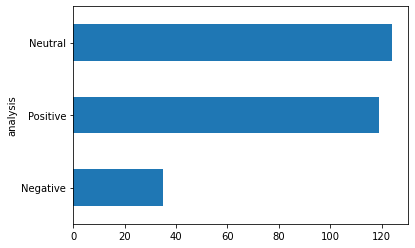

In [2]:
import matplotlib.pyplot as plt

counts = tweet_sentiment.groupby('analysis').polarity.count()
counts = counts.sort_values(ascending=False)

fig = plt.figure(figsize=(6,4))
counts.plot.barh(ylim=0).invert_yaxis()

### Mengambil data saham tanggal 4-12 November 2020, sesuai range tweet yang diambil dan dihitung sentimennya.

In [3]:
!pip install pandas_datareader

In [4]:
## sumber: https://medium.com/@a_dittt/cara-menghitung-return-saham-harian-menggunakan-python-cf6bf61939c5
import pandas_datareader as pdr
import datetime
ticker = str(input("Masukkan Kode Saham? "))

if not ".JK" in ticker:
    ticker += ".JK"
    start = str(input("Dari Tanggal? (yyyy-mm-dd) "))
    end = str(input("Sampai Tanggal? (yyyy-mm-dd) "))
    stockprice = pdr.data.get_data_yahoo(ticker, start, end)
    stockpricelabel = (ticker + "_" + "sampai" + "_" + end)
    stockprice.to_csv(stockpricelabel + ".csv")

Masukkan Kode Saham? BNGA
Dari Tanggal? (yyyy-mm-dd) 2020-11-04
Sampai Tanggal? (yyyy-mm-dd) 2020-11-12


In [4]:
stock_price = pandas.read_csv('BNGA.JK_sampai_2020-11-12.csv')
stock_price

,Date,High,Low,Open,Close,Volume,Adj Close
0,2020-11-04,765,745,755,745,4541900,745
1,2020-11-05,770,750,755,765,3251500,765
2,2020-11-06,795,760,770,785,8840400,785
3,2020-11-09,820,785,800,790,7735200,790
4,2020-11-10,810,790,800,805,10685800,805
5,2020-11-11,815,800,810,805,6279000,805
6,2020-11-12,810,795,805,800,2583100,800


In [5]:
return_stock = stock_price['Close'].pct_change()
print(return_stock)

0         NaN
1    0.026846
2    0.026144
3    0.006369
4    0.018987
5    0.000000
6   -0.006211
Name: Close, dtype: float64


In [6]:
return_harian = return_stock.mean()

In [7]:
print(str(round(return_harian * 100, 2)) + '%')

1.2%


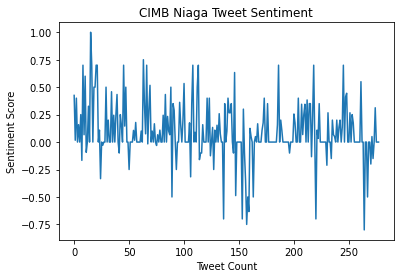

In [8]:
import matplotlib.pyplot as plt
plt.plot((tweet_sentiment['polarity'].values.tolist()))
plt.title('CIMB Niaga Tweet Sentiment')
plt.ylabel('Sentiment Score')
plt.xlabel('Tweet Count')
plt.show()

In [9]:
date_list = []

date_list.append(tweet_sentiment['date'].tolist())

In [10]:
from datetime import datetime
import re
import string

tweet_date_list = []

for i in date_list[0]:
    x = str(i)
    x = re.sub(r'[+]+', '', x)
    x = re.sub(r'\b(' + ' 0000' + r')\b', '', x)
    x = re.sub(r'\b([0-9][0-9]:[0-9][0-9]:[0-9][0-9]+' + r' )\b', '', x)
    x = re.sub(r'\b(' + '^[\s\S]{0,4}' + r')\b', '', x)
    x = re.sub(r'\b(' + 'Nov' + r')\b', '11', x)
    x = re.split("\s", x)
    x = "-".join(x)

#     print(x)
    tweet_date = datetime.strptime(x, '%m-%d-%Y').strftime('%Y-%m-%d')
    tweet_date_list.append(tweet_date)

In [11]:
type(tweet_date_list)

list

In [12]:
my_df = pandas.DataFrame(tweet_date_list)
my_df['polarity'] = tweet_sentiment['polarity']
my_df.rename(columns={0: 'date'})

,date,polarity
0,2020-11-12,0.425000
1,2020-11-12,0.016667
2,2020-11-12,0.400000
3,2020-11-12,0.000000
4,2020-11-12,0.158333
...,...,...
273,2020-11-04,0.000000
274,2020-11-04,0.312500
275,2020-11-04,0.000000
276,2020-11-04,0.000000


In [13]:
grouped_df = my_df.groupby(my_df[0])

mean_df = grouped_df.mean()

mean_df = mean_df.reset_index()
mean_df
mean_df.rename(columns={0: 'date'})

,date,polarity
0,2020-11-04,-0.012500
1,2020-11-05,0.108687
2,2020-11-06,0.091478
3,2020-11-07,0.050029
4,2020-11-08,-0.141912
5,2020-11-09,0.074539
6,2020-11-10,0.137090
7,2020-11-11,0.085778
8,2020-11-12,0.180233


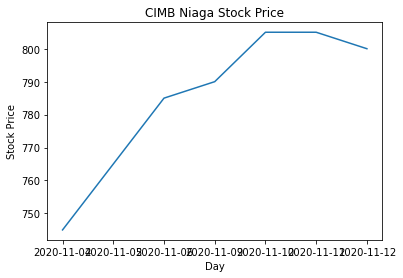

In [14]:
plt.plot(stock_price['Date'], (stock_price['Close'].values.tolist()))
plt.title('CIMB Niaga Stock Price')
plt.ylabel('Stock Price')
plt.xlabel('Day')
plt.show()

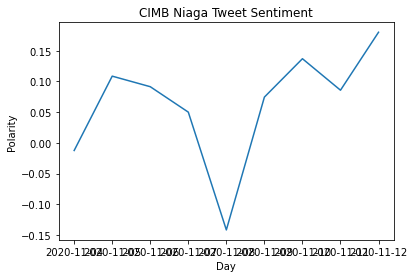

In [15]:
plt.plot(mean_df[0].values.tolist(), (mean_df['polarity'].values.tolist()))
plt.title('CIMB Niaga Tweet Sentiment')
plt.ylabel('Polarity')
plt.xlabel('Day')
plt.show()

In [16]:
corr = pandas.merge(
    mean_df,
    stock_price,
    left_on=[0],
    right_on=['Date']
)

In [17]:
corr_new = corr.drop(columns=[0, 'High', 'Low', 'Open', 'Volume', 'Adj Close'])
corr_new.columns = ['Polarity', 'Date', 'Close']
corr_new

,Polarity,Date,Close
0,-0.012500,2020-11-04,745
1,0.108687,2020-11-05,765
2,0.091478,2020-11-06,785
3,0.074539,2020-11-09,790
4,0.137090,2020-11-10,805
5,0.085778,2020-11-11,805
6,0.180233,2020-11-12,800


In [18]:
kendalcorr = corr_new.corr(method='kendall')
kendalcorr

,Polarity,Close
Polarity,1.00000,0.29277
Close,0.29277,1.00000


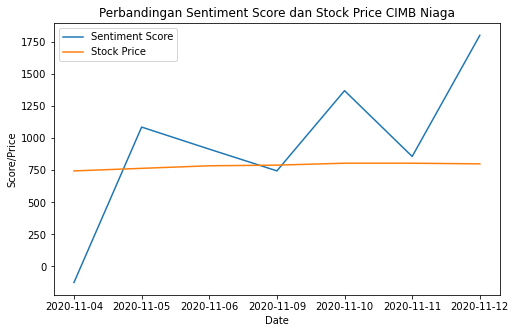

In [19]:
plt.figure(figsize=(8,5))
x1 = corr_new['Date']
y1 = corr_new['Polarity']*10000
plt.plot(x1, y1, label = "Sentiment Score")
x2 = corr_new['Date']
y2 = corr_new['Close']
plt.plot(x2, y2, label = "Stock Price")
plt.xlabel('Date')
plt.ylabel('Score/Price')
plt.title('Perbandingan Sentiment Score dan Stock Price CIMB Niaga')
plt.legend()
plt.show()

Correlation (Pearson, Kendall, Spearman)

Correlation is a bivariate analysis that measures the strength of association between two variables and the direction of the relationship.  In terms of the strength of relationship, the value of the correlation coefficient varies between +1 and -1.  A value of ± 1 indicates a perfect degree of association between the two variables.  As the correlation coefficient value goes towards 0, the relationship between the two variables will be weaker.  The direction of the relationship is indicated by the sign of the coefficient; a + sign indicates a positive relationship and a – sign indicates a negative relationship. Usually, in statistics, we measure four types of correlations: Pearson correlation, Kendall rank correlation, Spearman correlation, and the Point-Biserial correlation.

# Berdasarkan korelasi metode Kendall, harga saham tidak memiliki asosiasi yang kuat dengan nilai rata-rata sentimen tweet di Twitter

### Cross Validation
sumber: https://www.kaggle.com/babbler/cross-validation-considerations

##### K-fold Cross Validation

In [21]:
#sumber: https://www.kaggle.com/babbler/cross-validation-considerations
print("Sentiment Count:", tweet_sentiment['polarity'].size)
print("Sentiment Distribution:", tweet_sentiment['polarity'].value_counts(normalize=True), sep='\n')

Sentiment Count: 278
Sentiment Distribution:
 0.000000    0.446043
 0.700000    0.039568
 0.350000    0.028777
 0.500000    0.021583
 0.400000    0.021583
               ...   
 0.150000    0.003597
 0.383333    0.003597
 0.106250    0.003597
 0.150000    0.003597
-0.166667    0.003597
Name: polarity, Length: 84, dtype: float64


In [22]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
for f, split in enumerate(skf.split(tweet_sentiment, tweet_sentiment['analysis'])):
    print("Fold", f + 1, "-----")
    test = tweet_sentiment.iloc[split[1]]
    print("Size:", test.size)
    print("Sentiment Distribution:", tweet_sentiment['polarity'].value_counts(normalize=True), "", sep='\n')

Fold 1 -----
Size: 336
Sentiment Distribution:
 0.000000    0.446043
 0.700000    0.039568
 0.350000    0.028777
 0.500000    0.021583
 0.400000    0.021583
               ...   
 0.150000    0.003597
 0.383333    0.003597
 0.106250    0.003597
 0.150000    0.003597
-0.166667    0.003597
Name: polarity, Length: 84, dtype: float64

Fold 2 -----
Size: 336
Sentiment Distribution:
 0.000000    0.446043
 0.700000    0.039568
 0.350000    0.028777
 0.500000    0.021583
 0.400000    0.021583
               ...   
 0.150000    0.003597
 0.383333    0.003597
 0.106250    0.003597
 0.150000    0.003597
-0.166667    0.003597
Name: polarity, Length: 84, dtype: float64

Fold 3 -----
Size: 336
Sentiment Distribution:
 0.000000    0.446043
 0.700000    0.039568
 0.350000    0.028777
 0.500000    0.021583
 0.400000    0.021583
               ...   
 0.150000    0.003597
 0.383333    0.003597
 0.106250    0.003597
 0.150000    0.003597
-0.166667    0.003597
Name: polarity, Length: 84, dtype: float64

F

In [23]:
Id = "Positive"

print("Analysis", Id, "Sentiment Counts:\n")
for f, split in enumerate(skf.split(tweet_sentiment, tweet_sentiment['analysis'])):
    print("Fold ", f + 1, ":", sep='')
    test = tweet_sentiment['analysis'].iloc[split[1]]
    if Id in test.values:
        print(test[test == Id].value_counts(sort=False), "\n")
    else:
        print("None\n")
    
    # use this later
    if f == 0:
        split1 = split

Analysis Positive Sentiment Counts:

Fold 1:
Positive    24
Name: analysis, dtype: int64 

Fold 2:
Positive    24
Name: analysis, dtype: int64 

Fold 3:
Positive    24
Name: analysis, dtype: int64 

Fold 4:
Positive    24
Name: analysis, dtype: int64 

Fold 5:
Positive    23
Name: analysis, dtype: int64 



In [24]:
train = tweet_sentiment.iloc[split1[0]]
test = tweet_sentiment.iloc[split1[1]]

print("Train -----\nAnalysis =", Id, "Counts:")
print(train['analysis'][train['analysis'] == Id].value_counts(sort=False))
display(train['analysis'][(train['analysis'] == Id)])

print("Test -----\nAnalysis =", Id, "Counts:")
print(test['analysis'][test['analysis'] == Id].value_counts(sort=False))
display(test['analysis'][(test['analysis'] == Id)])

Train -----
Analysis = Positive Counts:
Positive    95
Name: analysis, dtype: int64


0      Positive
1      Positive
2      Positive
4      Positive
6      Positive
         ...   
247    Positive
251    Positive
254    Positive
271    Positive
274    Positive
Name: analysis, Length: 95, dtype: object

Test -----
Analysis = Positive Counts:
Positive    24
Name: analysis, dtype: int64


19     Positive
39     Positive
66     Positive
76     Positive
100    Positive
110    Positive
113    Positive
142    Positive
146    Positive
171    Positive
173    Positive
186    Positive
200    Positive
204    Positive
214    Positive
218    Positive
222    Positive
231    Positive
237    Positive
242    Positive
244    Positive
248    Positive
253    Positive
261    Positive
Name: analysis, dtype: object

##### Group K-fold Cross Validation

In [25]:
from sklearn.model_selection import GroupKFold

gkf = GroupKFold(n_splits=3)
print("Analysis", Id, "Sentiment Counts:\n")
for f, split in enumerate(gkf.split(tweet_sentiment, groups=tweet_sentiment['analysis'])):
    print("Fold ", f + 1, ":", sep='')
    test = tweet_sentiment['analysis'].iloc[split[1]]
    if Id in test.values:
        print(test[test == Id].value_counts(sort=False), "\n")
    else:
        print("None\n")

Analysis Positive Sentiment Counts:

Fold 1:
None

Fold 2:
Positive    119
Name: analysis, dtype: int64 

Fold 3:
None



In [26]:
for f, split in enumerate(gkf.split(tweet_sentiment, groups=tweet_sentiment['analysis'])):
    print("Fold", f + 1, "-----")
    test = tweet_sentiment['analysis'].iloc[split[1]]
    print("Size:", test.size)
    print("Sentiment Distribution:", test.value_counts(normalize=True), "", sep='\n')

Fold 1 -----
Size: 124
Sentiment Distribution:
Neutral    1.0
Name: analysis, dtype: float64

Fold 2 -----
Size: 119
Sentiment Distribution:
Positive    1.0
Name: analysis, dtype: float64

Fold 3 -----
Size: 35
Sentiment Distribution:
Negative    1.0
Name: analysis, dtype: float64



In [27]:
import nltk
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('tfidf',  TfidfVectorizer()),
    ('lr', LogisticRegression())
])

analyzer = TfidfVectorizer().build_analyzer()
stemmer = nltk.stem.SnowballStemmer('english')

pipeline.set_params(
    tfidf__analyzer=lambda x: (stemmer.stem(w) for w in analyzer(x)),
    tfidf__ngram_range=(1,2),
    lr__solver='sag',
    lr__multi_class='multinomial',
    lr__penalty='l2', 
    lr__tol=0.001, 
    lr__verbose=False)

param_grid = {
    'lr__C': np.linspace(1, 3, 11) # I think the value is close to 2 based on previous testing, and want to reduce runtime
}

gs = GridSearchCV(
    pipeline, 
    param_grid=param_grid,
    cv=gkf,
    verbose=1,
    return_train_score=False)

gs.fit(tweet_sentiment['full_text'], y=tweet_sentiment['analysis'], groups=tweet_sentiment['polarity'])
print("Best C:", gs.best_params_['lr__C'])

Fitting 3 folds for each of 11 candidates, totalling 33 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best C: 3.0


[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    2.8s finished


In [28]:
from sklearn.model_selection import cross_validate

pipeline.set_params(lr__C=gs.best_params_['lr__C'])

print("Running stratified k-fold...", end='')
skf_results = cross_validate(
    pipeline, 
    X=tweet_sentiment['full_text'], 
    y=tweet_sentiment['analysis'], 
    cv=skf, 
    return_train_score=False, 
    verbose=False)
print(" done.")

print("Running group k-fold...", end='')
gkf_results = cross_validate(
    pipeline, 
    X=tweet_sentiment['full_text'], 
    y=tweet_sentiment['analysis'], 
    groups=tweet_sentiment['polarity'], 
    cv=gkf, 
    return_train_score=False, 
    verbose=False)
print(" done.\n")

print("Stratified k-fold average accuracy:", np.mean(skf_results['test_score']))
print("Group k-fold average accuracy:", np.mean(gkf_results['test_score']))

Running stratified k-fold... done.
Running group k-fold... done.

Stratified k-fold average accuracy: 0.672922077922078
Group k-fold average accuracy: 0.24242424242424243


In [29]:
test = pandas.read_csv('tweet-clean-labeled3.csv')
test_pred = pipeline.fit(tweet_sentiment['full_text'], y=tweet_sentiment['analysis']).predict(test['full_text'])

submission = pandas.concat([test['analysis'], pandas.Series(test_pred, name='Sentiment')], axis=1)
submission.to_csv('sample_submission.csv', index=False)